## What is Naive Bayes algorithm?

- It is a  Statistical classification technique based on **Bayes Theorem** with an assumption of independence among predictors. In simple terms, a Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature.
 - Even if these features depend on each other or upon the existence of the other features, all of these properties independently contribute to the probability  and that is why it is known as ‘Naive’.
 - Naive Bayes model is easy to build and particularly useful for very large data sets. Along with simplicity, Naive Bayes is known to outperform even highly sophisticated classification methods.
 - Bayes theorem provides a way of calculating posterior probability P(c|x) from P(c), P(x) and P(x|c). Look at the equation below:
 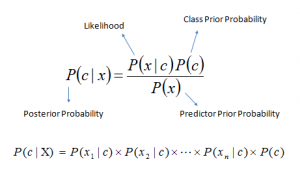
 
 Above,

- P(c|x) is the posterior probability of class (c, target) given predictor (x, attributes).
- P(c) is the prior probability of class.
- P(x|c) is the likelihood which is the probability of predictor given class.
- P(x) is the prior probability of predictor.

## How to build a basic model using Naive Bayes in Python?
Again, scikit learn (python library) will help here to build a Naive Bayes model in Python. There are three types of Naive Bayes model under scikit learn library:

### Gaussian 
It is used in classification and it assumes that features follow a normal distribution.

### Multinomial
It is used for discrete counts. For example, let’s say,  we have a text classification problem. Here we can consider bernoulli trials which is one step further and instead of “word occurring in the document”, we have “count how often word occurs in the document”, you can think of it as “number of times outcome number x_i is observed over the n trials”.

### Bernoulli 
The binomial model is useful if your feature vectors are binary (i.e. zeros and ones). One application would be text classification with ‘bag of words’ model where the 1s & 0s are “word occurs in the document” and “word does not occur in the document” respectively.
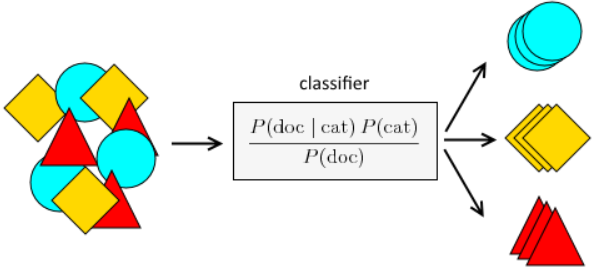

### Naive Bayes classifier calculates the probability of an event in the following steps:

- Step 1: Calculate the prior probability for given class labels
- Step 2: Find Likelihood probability with each attribute for each class
- Step 3: Put these value in Bayes Formula and calculate posterior probability.
- Step 4: See which class has a higher probability, given the input belongs to the higher probability class.

## Example

We are creating a data to predict "Play" or "Not Play" based on weather & temp.

In [5]:
# Assigning features and label variables
weather=['Sunny','Sunny','Overcast','Rainy','Rainy','Rainy','Overcast','Sunny','Sunny',
'Rainy','Sunny','Overcast','Overcast','Rainy']
temp=['Hot','Hot','Hot','Mild','Cool','Cool','Cool','Mild','Cool','Mild','Mild','Mild','Hot','Mild']

play=['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']

### Encoding Features
First, you need to convert these string labels into numbers. for example: 'Overcast', 'Rainy', 'Sunny' as 0, 1, 2. This is known as label encoding. Scikit-learn provides LabelEncoder library for encoding labels with a value between 0 and one less than the number of discrete classes.

In [6]:
# Import LabelEncoder
from sklearn import preprocessing
#creating labelEncoder
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
weather_encoded=le.fit_transform(weather)
print (weather_encoded)

[2 2 0 1 1 1 0 2 2 1 2 0 0 1]


In [14]:
# Converting string labels into numbers
temp_encoded=le.fit_transform(temp)
label=le.fit_transform(play)
print ("Temp:",temp_encoded)
print ("Play:",label)

Temp: [1 1 1 2 0 0 0 2 0 2 2 2 1 2]
Play: [0 0 1 1 1 0 1 0 1 1 1 1 1 0]


In [20]:
#Combinig weather and temp into single listof tuples

features=zip(weather_encoded,temp_encoded)
features=list(features)
features

[(2, 1),
 (2, 1),
 (0, 1),
 (1, 2),
 (1, 0),
 (1, 0),
 (0, 0),
 (2, 2),
 (2, 0),
 (1, 2),
 (2, 2),
 (0, 2),
 (0, 1),
 (1, 2)]

## Creating Naive_bayes Classifier

In [21]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets
model.fit(features,label)

#Predict Output
predicted= model.predict([[0,2]]) # 0:Overcast, 2:Mild
print ("Predicted Value:", predicted)

Predicted Value: [1]


### Insight
1. If overvast & Mild then play


## Naive Bayes with Multiple Labels

In [23]:
#Import scikit-learn dataset library
from sklearn import datasets
import pandas as pd

#Load dataset
wine = datasets.load_wine()

In [26]:
# print the names of the 13 features
print ("Features: ", wine.feature_names)

# print the label type of wine(class_0, class_1, class_2)
print ("Labels: ", wine.target_names)

Features:  ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Labels:  ['class_0' 'class_1' 'class_2']


In [27]:
# print data(feature)shape
wine.data.shape

(178, 13)

In [30]:
# print the wine data features (top 5 records)
wine.data[0:5]

array([[1.423e+01, 1.710e+00, 2.430e+00, 1.560e+01, 1.270e+02, 2.800e+00,
        3.060e+00, 2.800e-01, 2.290e+00, 5.640e+00, 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, 1.120e+01, 1.000e+02, 2.650e+00,
        2.760e+00, 2.600e-01, 1.280e+00, 4.380e+00, 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, 1.860e+01, 1.010e+02, 2.800e+00,
        3.240e+00, 3.000e-01, 2.810e+00, 5.680e+00, 1.030e+00, 3.170e+00,
        1.185e+03],
       [1.437e+01, 1.950e+00, 2.500e+00, 1.680e+01, 1.130e+02, 3.850e+00,
        3.490e+00, 2.400e-01, 2.180e+00, 7.800e+00, 8.600e-01, 3.450e+00,
        1.480e+03],
       [1.324e+01, 2.590e+00, 2.870e+00, 2.100e+01, 1.180e+02, 2.800e+00,
        2.690e+00, 3.900e-01, 1.820e+00, 4.320e+00, 1.040e+00, 2.930e+00,
        7.350e+02]])

In [31]:
# print the wine labels (0:Class_0, 1:class_2, 2:class_2)
print (wine.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [32]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.3,random_state=109) # 70% training and 30% test

In [33]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)

In [34]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9074074074074074
